<a href="https://colab.research.google.com/github/sbtsvk/Gravitron/blob/main/main_fisica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

proyecto fisica


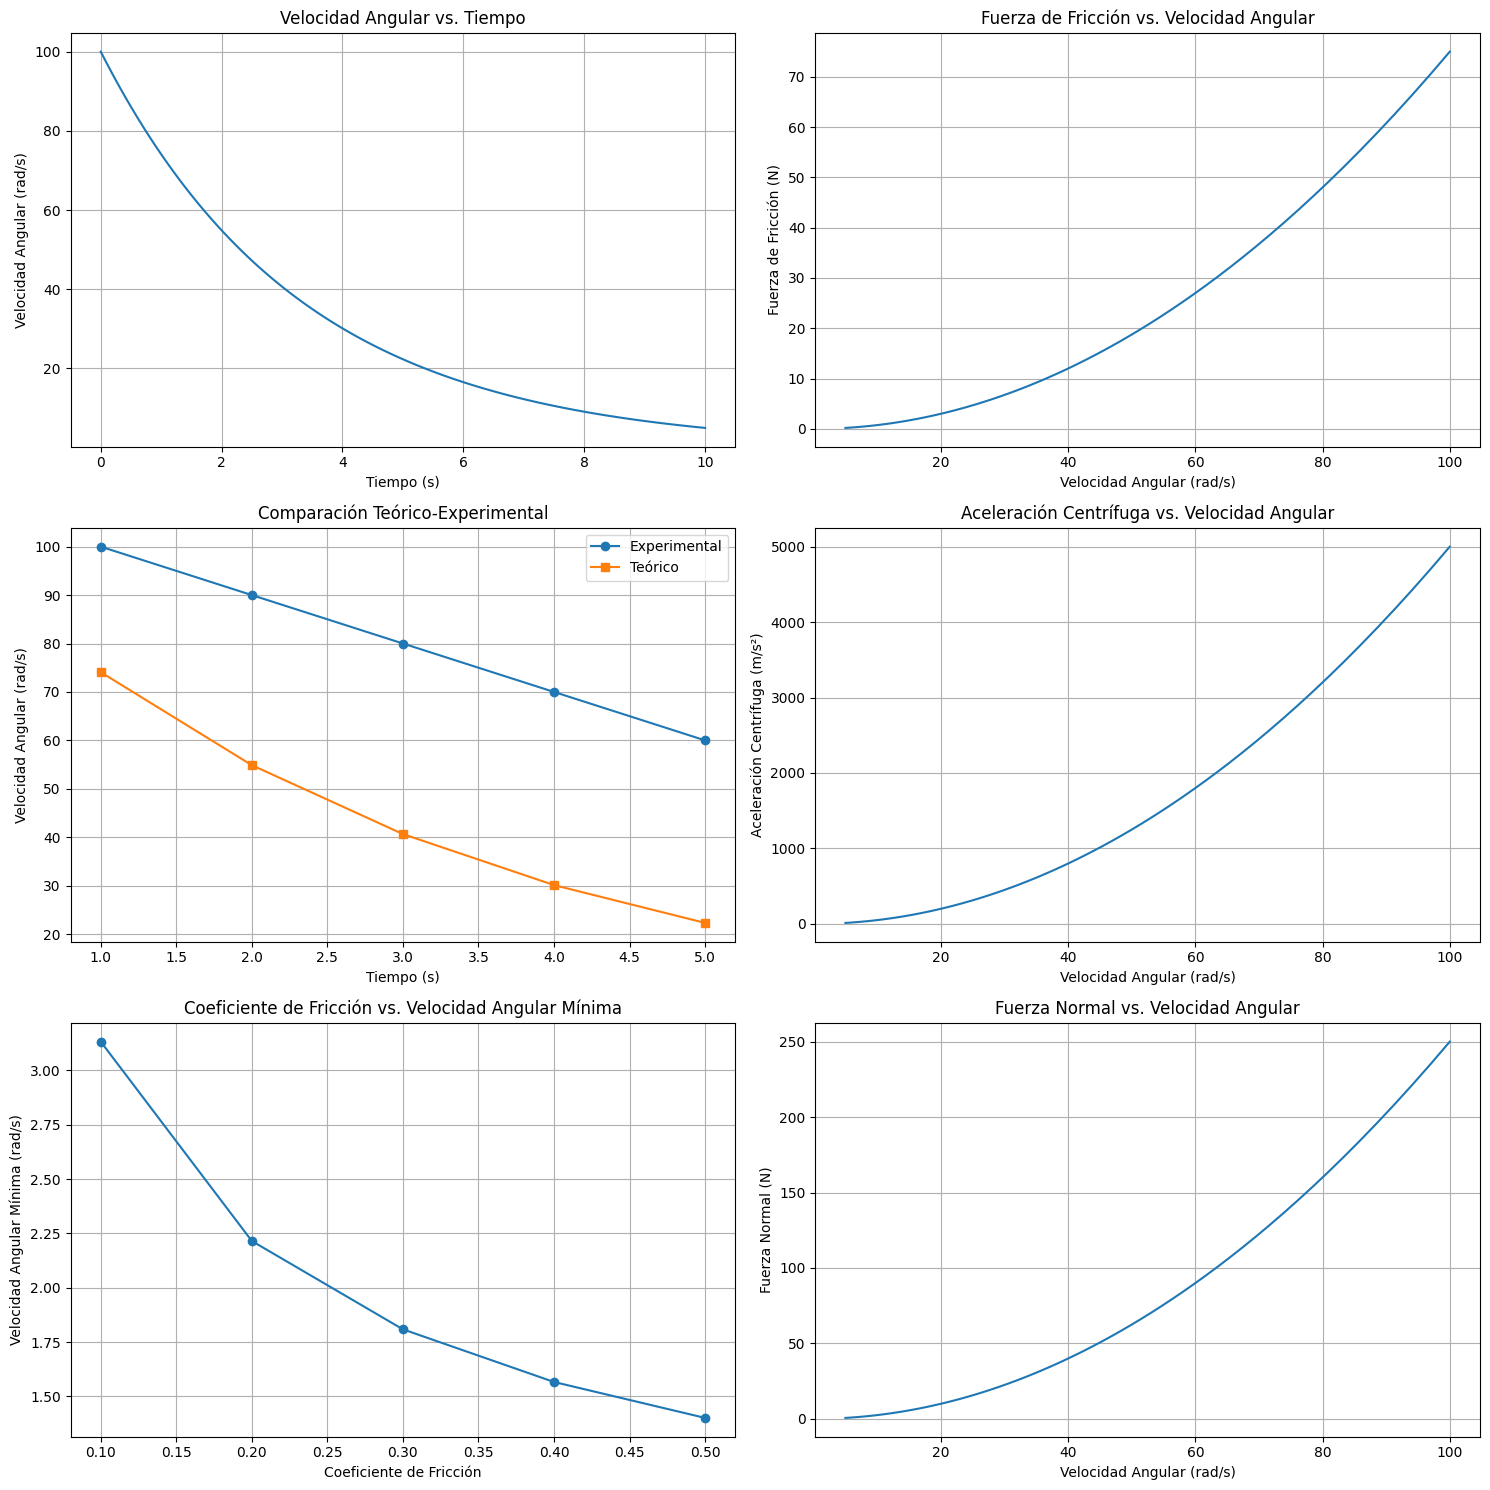

<ipython-input-3-f69ef293f8a0>:20: RuntimeWarning: invalid value encountered in sqrt
  vel_ang_min = [np.sqrt(peso * g / (cf * radio)) for cf in coef_friccion]


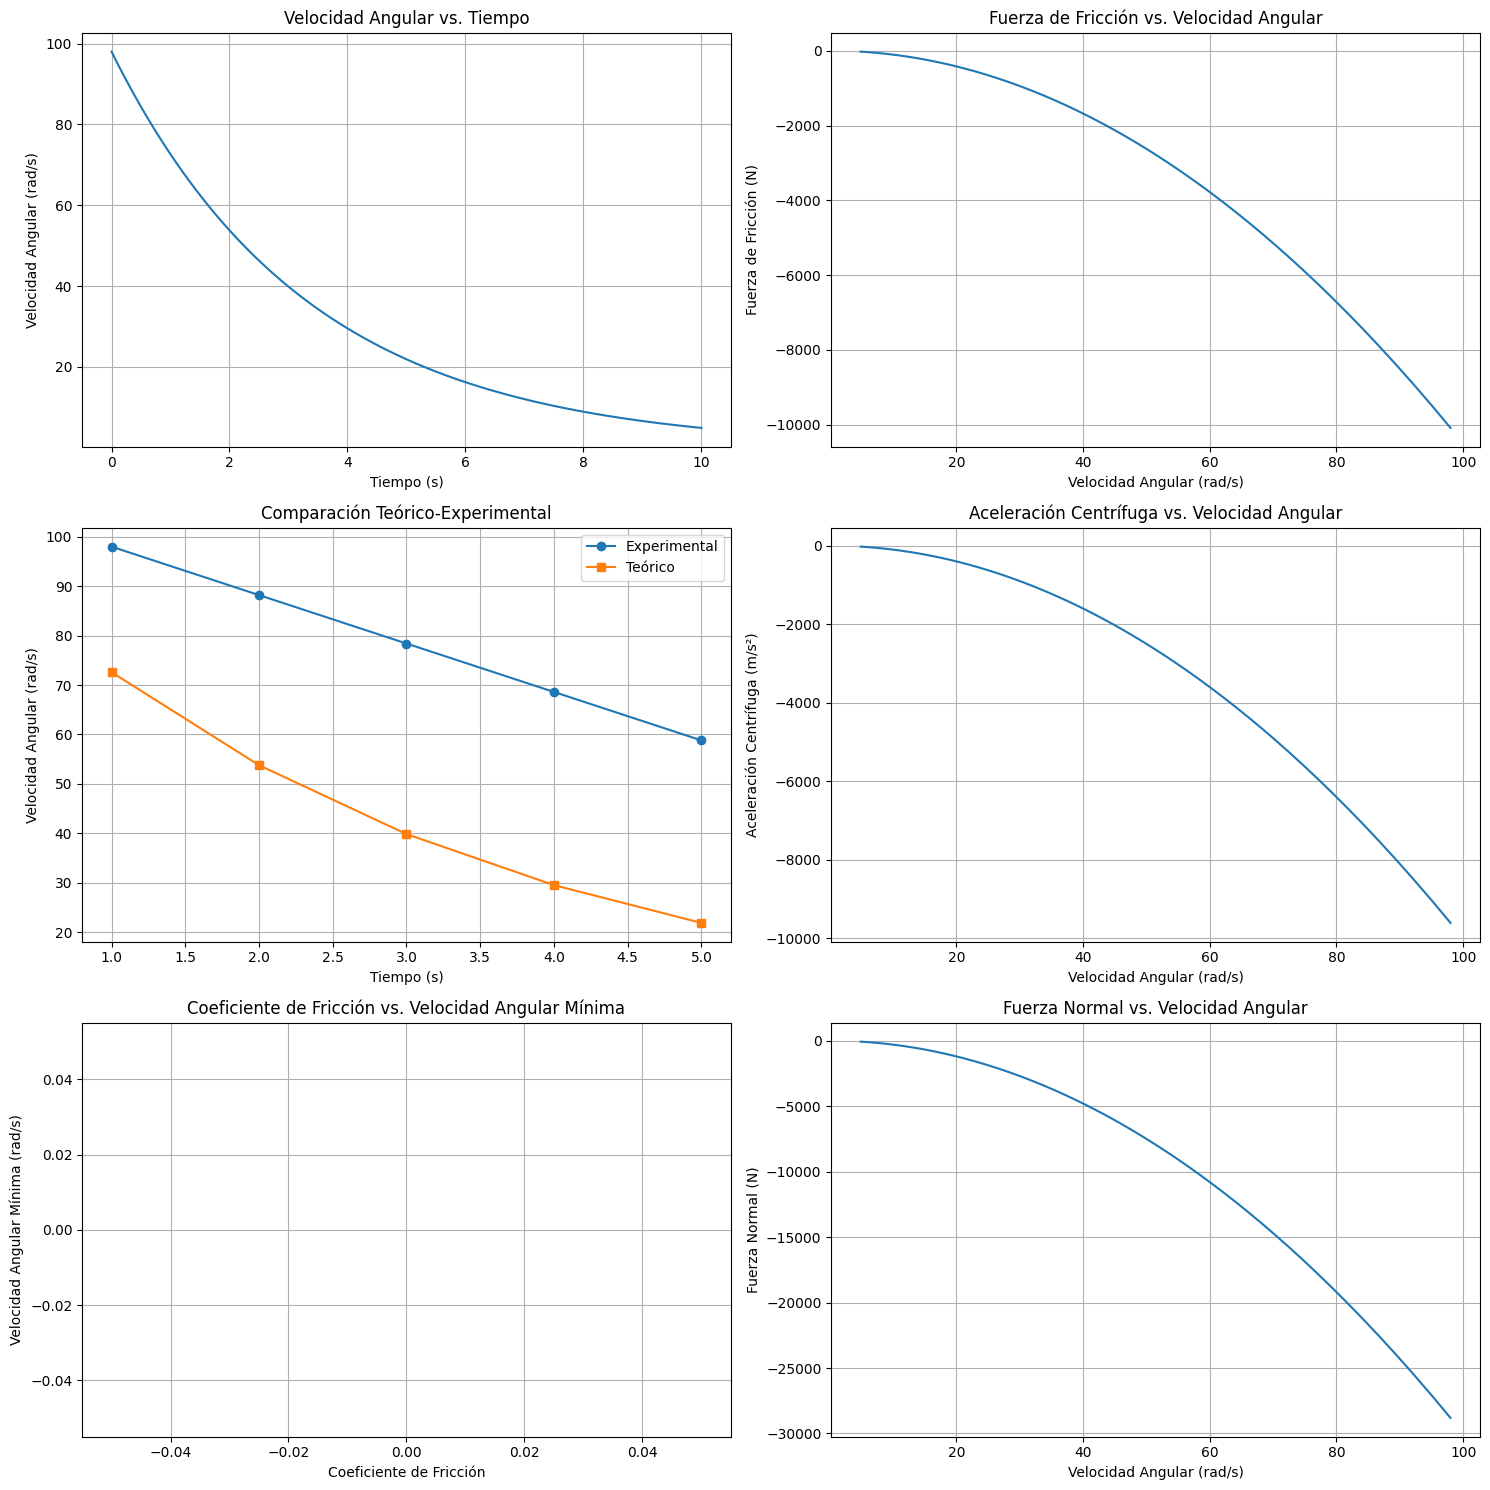

<ipython-input-3-f69ef293f8a0>:20: RuntimeWarning: invalid value encountered in sqrt
  vel_ang_min = [np.sqrt(peso * g / (cf * radio)) for cf in coef_friccion]


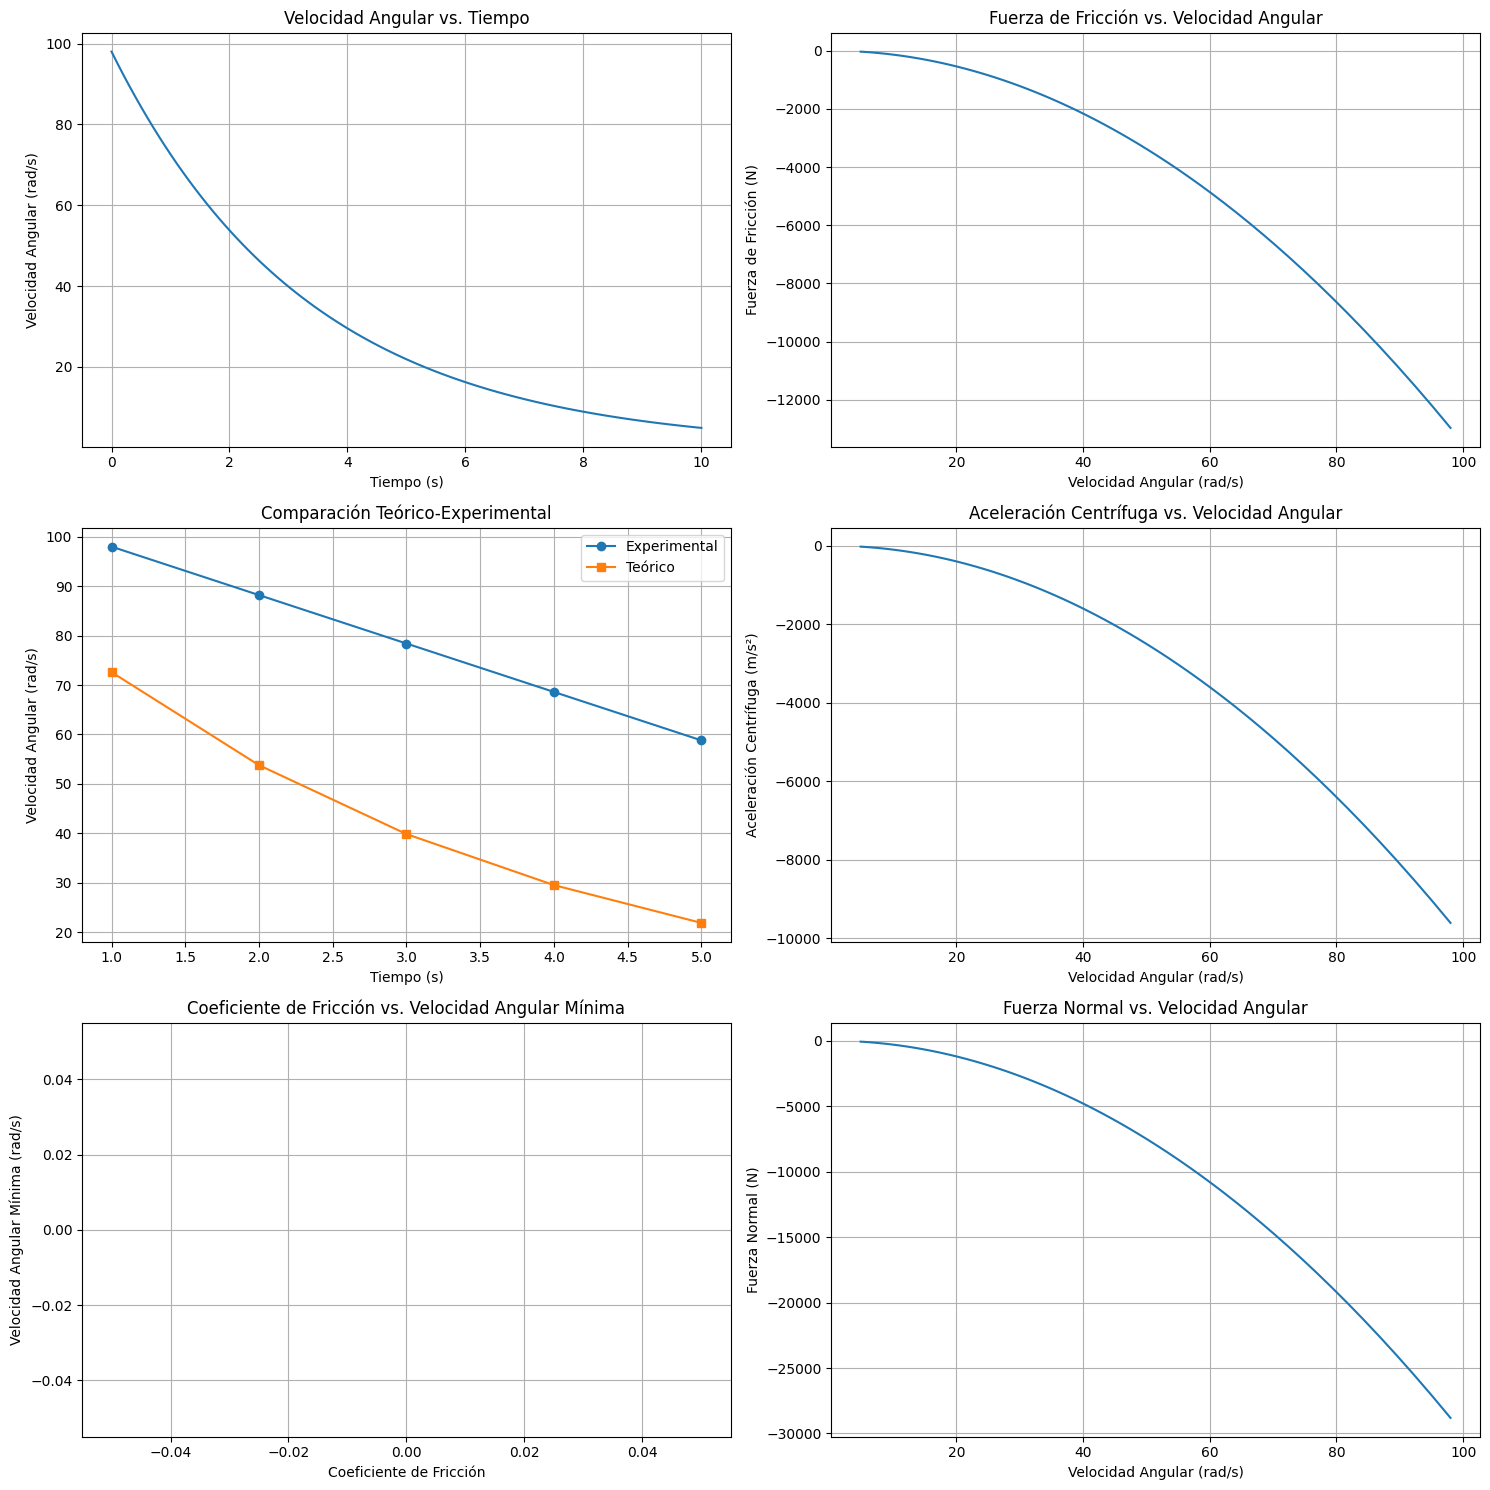

<ipython-input-3-f69ef293f8a0>:20: RuntimeWarning: invalid value encountered in sqrt
  vel_ang_min = [np.sqrt(peso * g / (cf * radio)) for cf in coef_friccion]


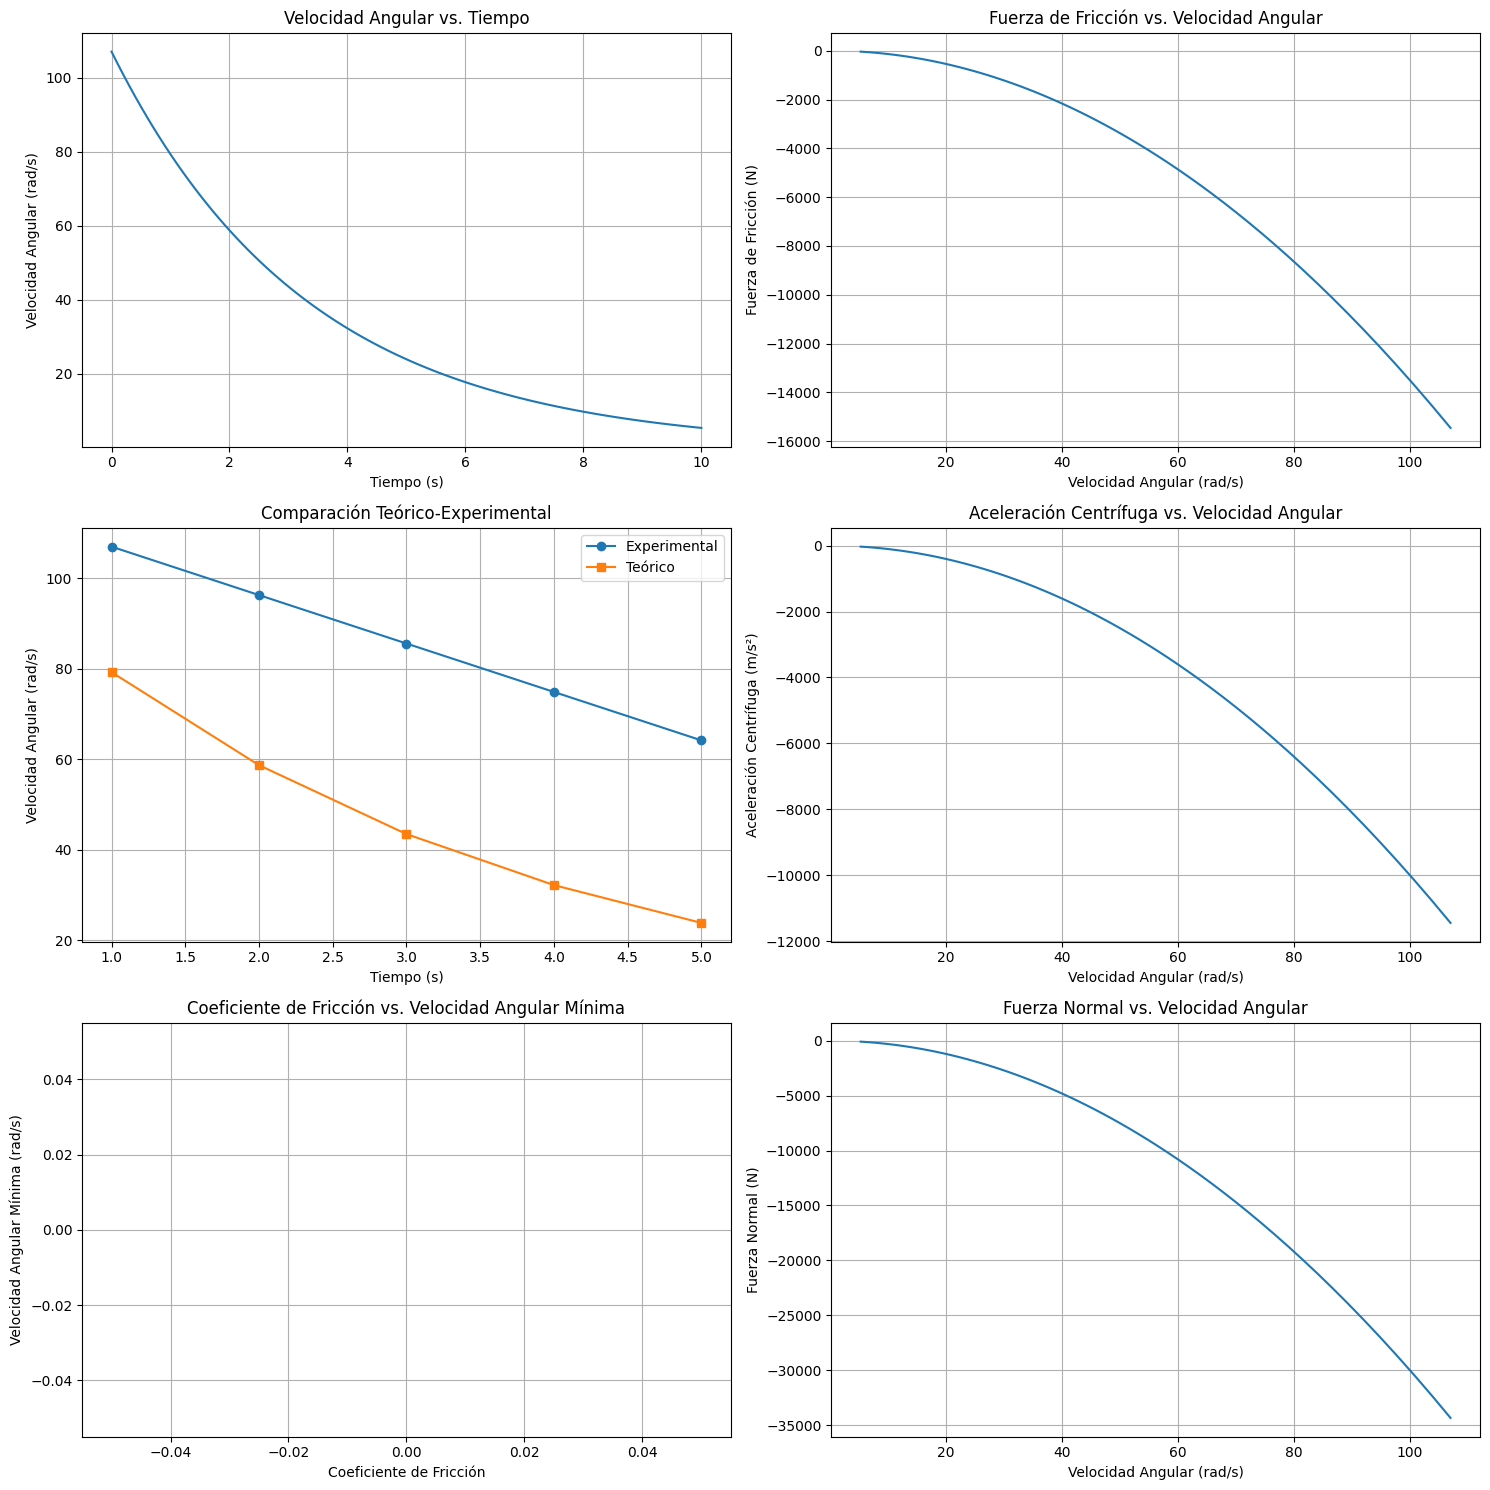

<ipython-input-3-f69ef293f8a0>:20: RuntimeWarning: invalid value encountered in sqrt
  vel_ang_min = [np.sqrt(peso * g / (cf * radio)) for cf in coef_friccion]


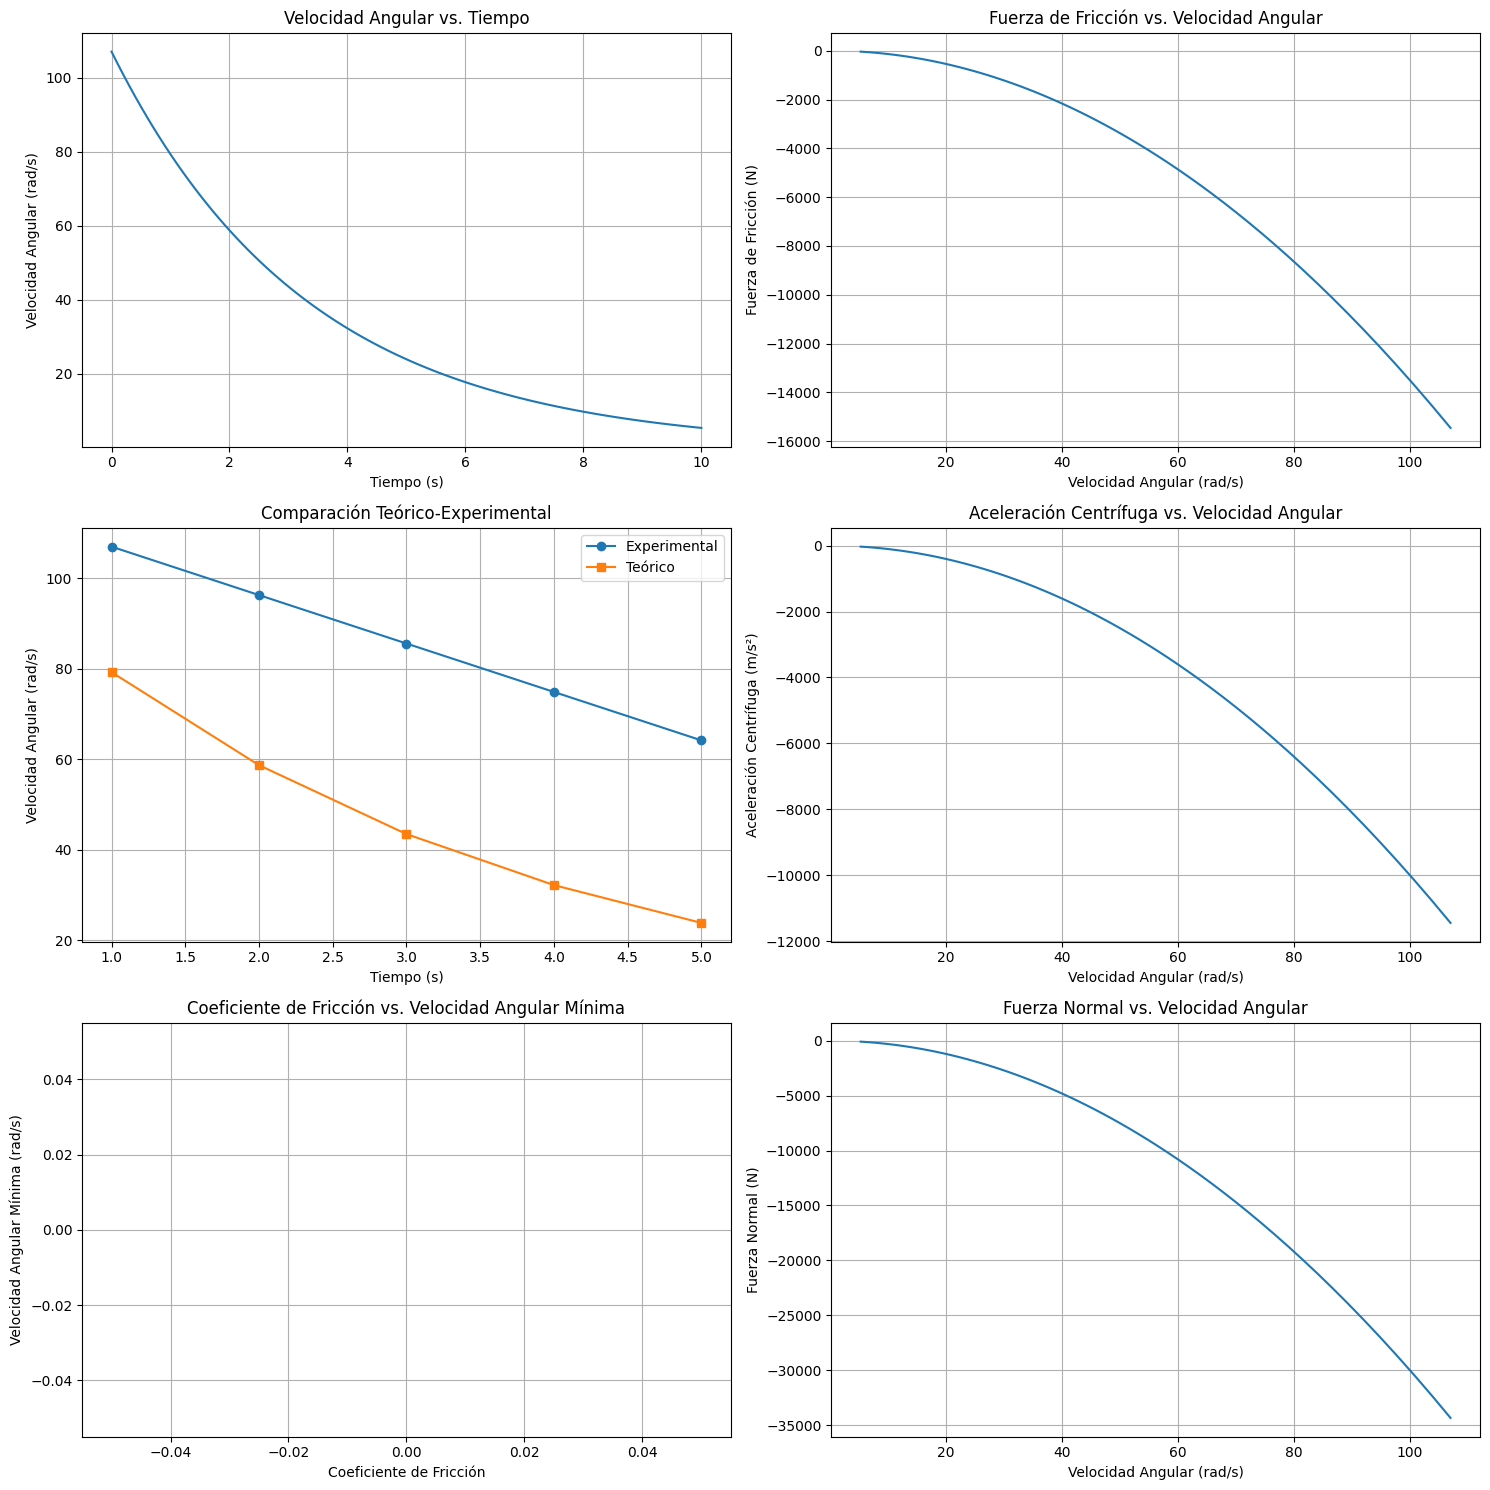

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive, HBox, VBox
from IPython.display import display

# Función para actualizar las gráficas basadas en los parámetros del usuario
def actualizar_graficas(mu, masa, radio, velocidad_inicial, peso):
    # Datos simulados para la velocidad angular
    tiempo = np.linspace(0, 10, 100)
    velocidad_angular = np.exp(-0.3 * tiempo) * velocidad_inicial

    # Cálculos adicionales
    g = 9.81
    aceleracion_centrifuga = radio * velocidad_angular**2
    fuerza_normal = masa * aceleracion_centrifuga

    # Datos para la gráfica de Coeficiente de Fricción vs. Velocidad Angular Mínima
    coef_friccion = np.linspace(0.1, 0.5, 5)
    vel_ang_min = [np.sqrt(peso * g / (cf * radio)) for cf in coef_friccion]

    # Crear figura y subgráficas
    fig, axs = plt.subplots(3, 2, figsize=(15, 15))

    # Primera gráfica (Velocidad Angular vs. Tiempo)
    axs[0, 0].plot(tiempo, velocidad_angular)
    axs[0, 0].set_xlabel('Tiempo (s)')
    axs[0, 0].set_ylabel('Velocidad Angular (rad/s)')
    axs[0, 0].set_title('Velocidad Angular vs. Tiempo')
    axs[0, 0].grid(True)

    # Segunda gráfica (Fuerza de Fricción vs. Velocidad Angular)
    fuerza_friccion = mu * fuerza_normal
    axs[0, 1].plot(velocidad_angular, fuerza_friccion)
    axs[0, 1].set_xlabel('Velocidad Angular (rad/s)')
    axs[0, 1].set_ylabel('Fuerza de Fricción (N)')
    axs[0, 1].set_title('Fuerza de Fricción vs. Velocidad Angular')
    axs[0, 1].grid(True)

    # Tercera gráfica (Comparación Teórico-Experimental)
    vel_ang_exp = np.array([velocidad_inicial, velocidad_inicial * 0.9, velocidad_inicial * 0.8, velocidad_inicial * 0.7, velocidad_inicial * 0.6])
    tiempo_exp = np.array([1, 2, 3, 4, 5])
    vel_ang_teorico = np.exp(-0.3 * tiempo_exp) * velocidad_inicial
    axs[1, 0].plot(tiempo_exp, vel_ang_exp, 'o-', label='Experimental')
    axs[1, 0].plot(tiempo_exp, vel_ang_teorico, 's-', label='Teórico')
    axs[1, 0].set_xlabel('Tiempo (s)')
    axs[1, 0].set_ylabel('Velocidad Angular (rad/s)')
    axs[1, 0].set_title('Comparación Teórico-Experimental')
    axs[1, 0].legend()
    axs[1, 0].grid(True)

    # Cuarta gráfica (Aceleración Centrífuga vs. Velocidad Angular)
    axs[1, 1].plot(velocidad_angular, aceleracion_centrifuga)
    axs[1, 1].set_xlabel('Velocidad Angular (rad/s)')
    axs[1, 1].set_ylabel('Aceleración Centrífuga (m/s²)')
    axs[1, 1].set_title('Aceleración Centrífuga vs. Velocidad Angular')
    axs[1, 1].grid(True)

    # Quinta gráfica (Coeficiente de Fricción vs. Velocidad Angular Mínima)
    axs[2, 0].plot(coef_friccion, vel_ang_min, 'o-')
    axs[2, 0].set_xlabel('Coeficiente de Fricción')
    axs[2, 0].set_ylabel('Velocidad Angular Mínima (rad/s)')
    axs[2, 0].set_title('Coeficiente de Fricción vs. Velocidad Angular Mínima')
    axs[2, 0].grid(True)

    # Sexta gráfica (Fuerza Normal vs. Velocidad Angular)
    axs[2, 1].plot(velocidad_angular, fuerza_normal)
    axs[2, 1].set_xlabel('Velocidad Angular (rad/s)')
    axs[2, 1].set_ylabel('Fuerza Normal (N)')
    axs[2, 1].set_title('Fuerza Normal vs. Velocidad Angular')
    axs[2, 1].grid(True)

    plt.tight_layout()
    plt.show()

# Crear widgets para la interfaz
mu_slider = widgets.FloatSlider(value=0.3, min=0.1, max=0.5, step=0.05, description='Coef. Fricción')
masa_input = widgets.FloatText(value=0.05, description='Masa (kg)')
radio_input = widgets.FloatText(value=0.5, description='Radio (m)')
velocidad_inicial_input = widgets.FloatText(value=100, description='Vel. Inicial (rad/s)')
peso_input = widgets.FloatText(value=0.05, description='Peso (kg)')

# Función para obtener valores de los inputs y actualizar las gráficas
def on_button_clicked(b):
    actualizar_graficas(mu_slider.value, masa_input.value, radio_input.value, velocidad_inicial_input.value, peso_input.value)

# Botón para actualizar las gráficas
button = widgets.Button(description='Actualizar Gráficas')
button.on_click(on_button_clicked)

# Disposición de la interfaz
input_widgets = VBox([mu_slider, masa_input, radio_input, velocidad_inicial_input, peso_input, button])
display(input_widgets)

# Inicializar la visualización de las gráficas
actualizar_graficas(mu_slider.value, masa_input.value, radio_input.value, velocidad_inicial_input.value, peso_input.value)